In [1]:
#使用keras 搭建神经网络
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Activation
from keras.layers import Conv2D,MaxPool2D #卷积层和池化层
from keras import backend as K

Using TensorFlow backend.
D:\Anaconda\envs\env_cv\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda\envs\env_cv\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda\envs\env_cv\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda\envs\env_cv\lib\site-packages\tensorflow\python\framework\dtypes.py:529

In [2]:
#加载数据
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

(60000, 28, 28)
(10000,)
3


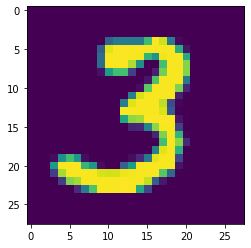

In [3]:
print(X_train.shape)
print(Y_test.shape)
plt.imshow(X_train[215,:,:])
print(Y_train[215])

In [4]:
#整理模型成可接受的格式
X_train=X_train.reshape(60000,28,28,1)
X_test=X_test.reshape(10000,28,28,1)

In [5]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [6]:
#查看输入输出范围
print(np.max(X_train))
print(np.min(X_test))

255
0


In [7]:
#对输入图像进行归一化处理
X_train=X_train/255
X_test=X_test/255
print(np.max(X_train))
print(np.min(X_test))

1.0
0.0


In [8]:
#对于输出进行one-hot-coding
Y_train=keras.utils.to_categorical(Y_train,10)
Y_test=keras.utils.to_categorical(Y_test,10)
print(Y_train.shape)
print(Y_test.shape)

(60000, 10)
(10000, 10)


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


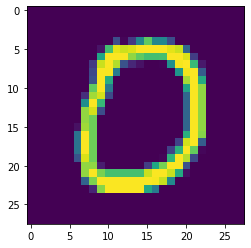

In [9]:
plt.imshow(X_test[10,:,:,0])
print(Y_test[10,:])

In [10]:
model=keras.models.Sequential()

model.add(Conv2D(32,(3,3),input_shape=(28,28,1)))#卷积层
model.add(Activation('relu'))#激活函数
model.add(Conv2D(32,(3,3)))#卷积层
model.add(Activation('relu'))#激活函数
model.add(MaxPool2D(pool_size=(2,2)))#2*2的池化层

model.add(Conv2D(64,(3,3)))#卷积层
model.add(Activation('relu'))#激活函数
model.add(Conv2D(64,(3,3)))#卷积层
model.add(Activation('relu'))#激活函数
model.add(MaxPool2D(pool_size=(2,2)))#2*2的池化层


Instructions for updating:
Colocations handled automatically by placer.


In [11]:
model.add(Flatten())#展开一条（一维或者说是一列的数组）
model.add(Dense(200))#加入200神经元的全连接
model.add(Activation('relu'))#激活
model.add(Dense(200))#全连接
model.add(Activation('relu'))#激活
model.add(Dense(10,activation='softmax'))#softmax全连接

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
activation_3 (Activation)    (None, 10, 10, 64)        0         
__________

In [13]:
#定义模型优化器
adam=keras.optimizers.Adam(lr=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-08)
#编译模型，定义损失函数，优化器
model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])

In [14]:
#训练模型
model.fit(X_train,Y_train,batch_size=100,epochs=1,verbose=1,validation_data=[X_test,Y_test])

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 91s 2ms/step - loss: 0.1659 - acc: 0.9485 - val_loss: 0.0530 - val_acc: 0.9831


out put: [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
label is:  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


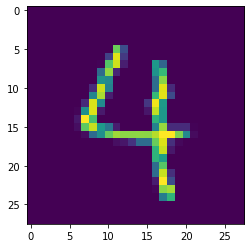

In [18]:
#展示效果
test_index=24
plt.imshow(X_test[test_index,:,:,0])
output=model.predict(X_test[test_index,:,:,0].reshape(1,28,28,1))
print('out put:',np.round(output))
print('label is: ',Y_test[test_index])

In [20]:
#模型的储存
model.save('model/My_alexNet_minst.h5')

In [21]:
#预先读取模型
from keras.models import load_model
model=load_model('model/My_alexNet_minst.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
activation_3 (Activation)    (None, 10, 10, 64)        0         
__________